In [1]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import scale
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
# GB
from sklearn.ensemble import GradientBoostingClassifier
# SVM
from sklearn.svm import SVC
# F1 Score
from sklearn.metrics import f1_score

warnings.filterwarnings('ignore')

import os
from os import chdir
chdir('/home/pirl/test/big data/project/2조/health_data')
os.getcwd()

'/home/pirl/test/big data/project/2조/health_data'

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline

mpl.rc('font', family = 'Malgun Gothic')

# 글시를 선명히
set_matplotlib_formats
# 음수처리
mpl.rc('axes', unicode_minus = False)

In [3]:
# 출력될 수 있는 칼럼 최대 갯수
pd.options.display.max_columns =100

In [27]:
data1= pd.read_csv("../health_data/2016_health_checkup_1.csv")
data2= pd.read_csv("../health_data/2016_health_checkup_2.csv")
data3= pd.read_csv("../health_data/2016_health_checkup_3.csv")
data4= pd.read_csv("../health_data/2016_health_checkup_4.csv")

data = data1.append(data2).append(data3).append(data4)
data = data.reset_index(drop=True)
data.head(20)

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
0,604509,1,12,41,165.0,65.0,7.0,1.2,1.0,1.0,1.0,103.0,61.0,82.0,183.0,101.0,42.0,120.0,14.2,1.0,0.9,21.0,17.0,17.0,1.0,0,NaN,0.0,0.0,0.0,0.0
1,360197,2,17,43,130.0,25.0,50.0,0.3,0.9,1.0,2.0,128.0,65.0,81.0,147.0,44.0,53.0,85.0,9.7,NaN,0.9,18.0,7.0,19.0,1.0,0,NaN,0.0,0.0,0.0,1.0
2,201061,2,17,45,150.0,135.0,51.0,0.5,0.5,1.0,1.0,110.0,65.0,155.0,101.0,81.0,54.0,30.0,11.3,1.0,0.6,21.0,18.0,24.0,1.0,0,NaN,1.0,0.0,0.0,0.0
3,586237,2,12,41,145.0,35.0,51.0,1.5,0.7,1.0,1.0,94.0,64.0,89.0,188.0,71.0,66.0,108.0,11.5,1.0,0.8,15.0,14.0,18.0,3.0,0,NaN,0.0,0.0,0.0,0.0
4,922457,2,9,11,150.0,35.0,51.0,1.2,1.0,1.0,1.0,110.0,70.0,94.0,211.0,87.0,87.0,107.0,13.3,1.0,0.7,18.0,10.0,20.0,1.0,1,0.0,0.0,0.0,0.0,0.0
5,220613,2,18,43,NaN,NaN,51.0,9.9,9.9,1.0,1.0,100.0,66.0,102.0,155.0,87.0,47.0,91.0,11.6,1.0,0.3,26.0,17.0,15.0,1.0,0,NaN,0.0,0.0,0.0,0.0
6,982201,2,10,11,150.0,35.0,52.0,1.2,1.2,1.0,1.0,95.0,62.0,74.0,165.0,53.0,80.0,74.0,13.2,1.0,0.7,26.0,23.0,21.0,1.0,1,1.0,0.0,0.0,0.0,0.0
7,750333,2,5,41,160.0,40.0,52.0,1.0,1.0,1.0,1.0,90.0,60.0,90.0,185.0,46.0,71.0,105.0,13.6,1.0,0.7,34.0,34.0,24.0,1.0,1,0.0,0.0,0.0,0.0,0.0
8,981601,2,8,27,155.0,45.0,52.0,1.0,0.9,1.0,1.0,98.0,60.0,88.0,227.0,45.0,79.0,139.0,13.6,1.0,0.8,19.0,9.0,10.0,1.0,1,0.0,0.0,0.0,0.0,1.0
9,932701,2,18,27,140.0,30.0,53.0,0.5,0.5,2.0,2.0,120.0,70.0,266.0,190.0,86.0,63.0,109.0,9.6,1.0,0.9,26.0,18.0,64.0,1.0,0,NaN,1.0,0.0,0.0,0.0


# 결측치 처리

In [28]:
data.loc[(data['총콜레스테롤'].isnull() ==True),'총콜레스테롤'] = (data["HDL콜레스테롤"]+data["LDL콜레스테롤"]+data["트리글리세라이드"]/5)
data.loc[(data['HDL콜레스테롤'].isnull() ==True),'HDL콜레스테롤'] = (data["총콜레스테롤"]-data["LDL콜레스테롤"]-data["트리글리세라이드"]/5)
data.loc[(data['LDL콜레스테롤'].isnull() ==True),'LDL콜레스테롤'] = (data["총콜레스테롤"]-data["HDL콜레스테롤"]-data["트리글리세라이드"]/5)
data.loc[(data['트리글리세라이드'].isnull() ==True),'트리글리세라이드'] = ((data["총콜레스테롤"]-data["HDL콜레스테롤"]-data["LDL콜레스테롤"])*5)

In [29]:
data.isnull().sum()

가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)         901
체중(5Kg단위)         903
허리둘레              197
시력(좌)             300
시력(우)             299
청력(좌)             266
청력(우)             266
수축기혈압              88
이완기혈압              89
식전혈당(공복혈당)         54
총콜레스테롤             43
트리글리세라이드           44
HDL콜레스테롤           45
LDL콜레스테롤           45
혈색소                56
요단백              4899
혈청크레아티닌            45
(혈청지오티)AST         42
(혈청지오티)ALT         43
감마지티피              43
흡연상태              213
구강검진 수검여부           0
치석             598237
당뇨병 의사 판정          54
고혈압 의사 판정          87
간기능 이상여부           42
알콜성간염여부            43
dtype: int64

In [30]:
# 2개이상 결측치인 경우 제거
data = data.dropna(subset=['총콜레스테롤'], how='all')
data = data.dropna(subset=['HDL콜레스테롤'], how='all')
data = data.dropna(subset=['LDL콜레스테롤'], how='all')
data = data.dropna(subset=['트리글리세라이드'], how='all')

In [31]:
data.isnull().sum()

가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)         900
체중(5Kg단위)         902
허리둘레              196
시력(좌)             299
시력(우)             298
청력(좌)             265
청력(우)             265
수축기혈압              87
이완기혈압              88
식전혈당(공복혈당)         11
총콜레스테롤              0
트리글리세라이드            0
HDL콜레스테롤            0
LDL콜레스테롤            0
혈색소                15
요단백              4888
혈청크레아티닌             2
(혈청지오티)AST          0
(혈청지오티)ALT          1
감마지티피               1
흡연상태              213
구강검진 수검여부           0
치석             598214
당뇨병 의사 판정          11
고혈압 의사 판정          86
간기능 이상여부            0
알콜성간염여부             1
dtype: int64

# 이상치 처리

In [32]:
data = data[data['총콜레스테롤'] < 297]
data = data[data['HDL콜레스테롤'] < 98]
data = data[data['LDL콜레스테롤'] < 205]
data = data[data['트리글리세라이드'] < 298]

In [33]:
data.describe()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
count,927760.000000,927760.000000,927760.000000,927760.000000,926916.000000,926916.000000,927583.000000,927474.000000,927475.000000,927504.000000,927504.000000,927674.000000,927673.000000,927750.000000,927760.000000,927760.000000,927760.000000,927760.000000,927747.000000,923129.000000,927758.000000,927760.000000,927759.000000,927759.000000,927554.000000,927760.000000,373920.000000,927750.000000,927675.000000,927760.000000,927759.000000
mean,500007.246306,1.476939,10.479149,33.632289,162.253964,62.857977,80.926908,0.981336,0.977972,1.031425,1.030316,121.889876,75.698318,99.309593,193.041202,115.399104,56.316654,113.628002,14.135193,1.088535,0.868185,25.234144,24.893458,34.300094,1.593246,0.403036,0.602610,0.067242,0.039112,0.034991,0.039864
std,288743.338566,0.499468,2.870462,12.703561,9.569016,12.518882,15.888341,0.621001,0.612701,0.174464,0.171455,14.461752,9.784089,22.830648,35.150261,57.886865,13.581035,32.181873,1.616630,0.421706,0.511150,19.269282,24.571012,43.865862,0.814470,0.490508,0.587779,0.250441,0.193861,0.183756,0.195639
min,1.000000,1.000000,5.000000,11.000000,100.000000,20.000000,2.000000,0.100000,0.100000,1.000000,1.000000,60.000000,34.000000,18.000000,19.000000,1.000000,0.200000,-33.400000,0.600000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249859.750000,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,111.000000,70.000000,88.000000,168.000000,71.000000,46.000000,91.000000,13.100000,1.000000,0.700000,18.000000,14.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500109.500000,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,95.000000,192.000000,102.000000,55.000000,112.000000,14.200000,1.000000,0.800000,22.000000,20.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,750131.250000,2.000000,13.000000,44.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,130.000000,80.000000,104.000000,217.000000,148.000000,65.000000,135.000000,15.300000,1.000000,1.000000,28.000000,28.000000,37.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,18.000000,49.000000,1900.000000,175.000000,999.000000,9.900000,9.900000,2.000000,2.000000,270.000000,159.000000,899.000000,296.000000,297.000000,97.000000,204.000000,25.000000,6.000000,95.000000,7670.000000,7090.000000,999.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.query("LDL콜레스테롤 == 'NaN'")

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
3262,101949,2,11,27,160.0,45.0,66.0,0.6,0.5,1.0,1.0,114.0,76.0,100.0,256.0,45.0,87.0,NaN,14.7,1.0,0.8,28.0,12.0,15.0,1.0,0,NaN,0.0,0.0,0.0,1.0
4714,776001,1,12,31,155.0,50.0,67.0,0.6,0.6,2.0,1.0,130.0,72.0,105.0,177.0,742.0,49.0,NaN,15.6,1.0,0.9,41.0,31.0,111.0,3.0,1,0.0,0.0,0.0,0.0,0.0
4898,439989,1,10,28,165.0,55.0,67.0,1.2,1.5,1.0,1.0,107.0,74.0,96.0,122.0,92.0,48.0,NaN,14.8,1.0,0.7,29.0,22.0,15.0,1.0,1,1.0,0.0,0.0,0.0,0.0
5076,16753,2,16,31,145.0,40.0,68.0,0.1,0.1,1.0,1.0,113.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
6221,937721,2,9,27,160.0,55.0,68.0,1.2,0.8,1.0,1.0,116.0,65.0,121.0,246.0,536.0,51.0,NaN,12.2,1.0,0.6,20.0,5.0,8.0,1.0,0,NaN,0.0,0.0,0.0,1.0
6822,391297,2,5,41,160.0,50.0,69.0,1.0,1.2,1.0,1.0,93.0,58.0,77.0,170.0,38.0,65.0,NaN,12.1,1.0,0.6,21.0,17.0,13.0,1.0,0,NaN,0.0,0.0,0.0,0.0
7300,578577,2,9,41,165.0,55.0,69.0,1.0,0.8,1.0,1.0,120.0,70.0,105.0,112.0,265.0,69.0,NaN,13.3,1.0,0.8,33.0,32.0,52.0,1.0,0,NaN,0.0,0.0,0.0,0.0
7452,81381,2,6,27,175.0,60.0,69.0,1.2,1.2,1.0,1.0,97.0,69.0,88.0,199.0,61.0,52.0,NaN,13.1,1.0,0.8,27.0,21.0,26.0,1.0,0,NaN,0.0,0.0,0.0,0.0
8808,700149,2,9,41,165.0,55.0,70.0,1.2,0.9,1.0,1.0,130.0,80.0,88.0,171.0,407.0,42.0,NaN,14.5,1.0,0.8,21.0,21.0,35.0,1.0,0,NaN,0.0,0.0,0.0,0.0
9850,760085,1,11,47,170.0,50.0,71.0,1.5,1.2,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0,NaN,NaN,0.0,NaN,NaN


In [6]:
data.loc[(data['총콜레스테롤'].isnull() ==True),'총콜레스테롤'] = (data["HDL콜레스테롤"]+data["LDL콜레스테롤"]+data["트리글리세라이드"]/5)

#data.loc[data['총콜레스테롤']=='NaN']

In [7]:
data.query("총콜레스테롤 == 'NaN'")

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
5076,16753,2,16,31,145.0,40.0,68.0,0.1,0.1,1.0,1.0,113.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
9850,760085,1,11,47,170.0,50.0,71.0,1.5,1.2,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0,NaN,NaN,0.0,NaN,NaN
41377,737269,2,13,43,150.0,65.0,85.0,1.0,1.0,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
111321,781140,1,13,11,160.0,65.0,86.0,0.4,0.8,1.0,1.0,153.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
137271,196339,2,13,44,155.0,60.0,82.0,0.9,1.0,1.0,1.0,138.0,84.0,NaN,NaN,142.0,NaN,128.0,14.0,1.0,0.8,19.0,16.0,22.0,1.0,1,0.0,NaN,0.0,0.0,0.0
160431,566899,1,7,42,180.0,80.0,85.0,1.5,1.5,1.0,1.0,137.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
174431,790899,2,7,41,170.0,55.0,68.0,1.0,1.2,1.0,1.0,133.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
223215,408878,1,11,41,160.0,70.0,92.0,0.7,0.7,1.0,1.0,130.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
235155,506990,2,10,41,155.0,55.0,71.0,1.2,1.5,1.0,1.0,108.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
239113,893182,2,8,11,155.0,45.0,69.0,1.0,0.9,1.0,1.0,97.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,0.0,NaN,0.0,NaN,NaN


In [8]:
data.loc[(data['HDL콜레스테롤'].isnull() ==True),'HDL콜레스테롤'] = (data["총콜레스테롤"]-data["LDL콜레스테롤"]-data["트리글리세라이드"]/5)

In [9]:
data.query("HDL콜레스테롤 == 'NaN'")

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
5076,16753,2,16,31,145.0,40.0,68.0,0.1,0.1,1.0,1.0,113.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
9850,760085,1,11,47,170.0,50.0,71.0,1.5,1.2,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0,NaN,NaN,0.0,NaN,NaN
41377,737269,2,13,43,150.0,65.0,85.0,1.0,1.0,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
111321,781140,1,13,11,160.0,65.0,86.0,0.4,0.8,1.0,1.0,153.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
137271,196339,2,13,44,155.0,60.0,82.0,0.9,1.0,1.0,1.0,138.0,84.0,NaN,NaN,142.0,NaN,128.0,14.0,1.0,0.8,19.0,16.0,22.0,1.0,1,0.0,NaN,0.0,0.0,0.0
160431,566899,1,7,42,180.0,80.0,85.0,1.5,1.5,1.0,1.0,137.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
174431,790899,2,7,41,170.0,55.0,68.0,1.0,1.2,1.0,1.0,133.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
223215,408878,1,11,41,160.0,70.0,92.0,0.7,0.7,1.0,1.0,130.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
235155,506990,2,10,41,155.0,55.0,71.0,1.2,1.5,1.0,1.0,108.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
239113,893182,2,8,11,155.0,45.0,69.0,1.0,0.9,1.0,1.0,97.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,0.0,NaN,0.0,NaN,NaN


In [10]:
data.loc[(data['LDL콜레스테롤'].isnull() ==True),'LDL콜레스테롤'] = (data["총콜레스테롤"]-data["HDL콜레스테롤"]-data["트리글리세라이드"]/5)

In [11]:
data.query("LDL콜레스테롤 == 'NaN'")

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
5076,16753,2,16,31,145.0,40.0,68.0,0.1,0.1,1.0,1.0,113.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
9850,760085,1,11,47,170.0,50.0,71.0,1.5,1.2,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0,NaN,NaN,0.0,NaN,NaN
41377,737269,2,13,43,150.0,65.0,85.0,1.0,1.0,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
111321,781140,1,13,11,160.0,65.0,86.0,0.4,0.8,1.0,1.0,153.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
160431,566899,1,7,42,180.0,80.0,85.0,1.5,1.5,1.0,1.0,137.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
174431,790899,2,7,41,170.0,55.0,68.0,1.0,1.2,1.0,1.0,133.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
223215,408878,1,11,41,160.0,70.0,92.0,0.7,0.7,1.0,1.0,130.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
235155,506990,2,10,41,155.0,55.0,71.0,1.2,1.5,1.0,1.0,108.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
239113,893182,2,8,11,155.0,45.0,69.0,1.0,0.9,1.0,1.0,97.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,0.0,NaN,0.0,NaN,NaN
275600,648957,2,12,11,150.0,55.0,79.0,1.2,1.0,1.0,1.0,134.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN


In [12]:
data.loc[(data['트리글리세라이드'].isnull() ==True),'트리글리세라이드'] = ((data["총콜레스테롤"]-data["HDL콜레스테롤"]-data["LDL콜레스테롤"])*5)

In [13]:
data.query("트리글리세라이드 == 'NaN'")

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
5076,16753,2,16,31,145.0,40.0,68.0,0.1,0.1,1.0,1.0,113.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
9850,760085,1,11,47,170.0,50.0,71.0,1.5,1.2,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0,NaN,NaN,0.0,NaN,NaN
41377,737269,2,13,43,150.0,65.0,85.0,1.0,1.0,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
111321,781140,1,13,11,160.0,65.0,86.0,0.4,0.8,1.0,1.0,153.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
160431,566899,1,7,42,180.0,80.0,85.0,1.5,1.5,1.0,1.0,137.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
174431,790899,2,7,41,170.0,55.0,68.0,1.0,1.2,1.0,1.0,133.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
223215,408878,1,11,41,160.0,70.0,92.0,0.7,0.7,1.0,1.0,130.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
235155,506990,2,10,41,155.0,55.0,71.0,1.2,1.5,1.0,1.0,108.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
239113,893182,2,8,11,155.0,45.0,69.0,1.0,0.9,1.0,1.0,97.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,0.0,NaN,0.0,NaN,NaN
275600,648957,2,12,11,150.0,55.0,79.0,1.2,1.0,1.0,1.0,134.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN


In [14]:
data.isnull().sum()

가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)         901
체중(5Kg단위)         903
허리둘레              197
시력(좌)             300
시력(우)             299
청력(좌)             266
청력(우)             266
수축기혈압              88
이완기혈압              89
식전혈당(공복혈당)         54
총콜레스테롤             43
트리글리세라이드           44
HDL콜레스테롤           45
LDL콜레스테롤           45
혈색소                56
요단백              4899
혈청크레아티닌            45
(혈청지오티)AST         42
(혈청지오티)ALT         43
감마지티피              43
흡연상태              213
구강검진 수검여부           0
치석             598237
당뇨병 의사 판정          54
고혈압 의사 판정          87
간기능 이상여부           42
알콜성간염여부            43
dtype: int64

In [15]:
data.query("LDL콜레스테롤 == 'NaN'")

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
5076,16753,2,16,31,145.0,40.0,68.0,0.1,0.1,1.0,1.0,113.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
9850,760085,1,11,47,170.0,50.0,71.0,1.5,1.2,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0,NaN,NaN,0.0,NaN,NaN
41377,737269,2,13,43,150.0,65.0,85.0,1.0,1.0,1.0,1.0,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
111321,781140,1,13,11,160.0,65.0,86.0,0.4,0.8,1.0,1.0,153.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
160431,566899,1,7,42,180.0,80.0,85.0,1.5,1.5,1.0,1.0,137.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN
174431,790899,2,7,41,170.0,55.0,68.0,1.0,1.2,1.0,1.0,133.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
223215,408878,1,11,41,160.0,70.0,92.0,0.7,0.7,1.0,1.0,130.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,0.0,NaN,NaN
235155,506990,2,10,41,155.0,55.0,71.0,1.2,1.5,1.0,1.0,108.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,0.0,NaN,0.0,NaN,NaN
239113,893182,2,8,11,155.0,45.0,69.0,1.0,0.9,1.0,1.0,97.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,0.0,NaN,0.0,NaN,NaN
275600,648957,2,12,11,150.0,55.0,79.0,1.2,1.0,1.0,1.0,134.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN,NaN,0.0,NaN,NaN


In [16]:
data = data.dropna(subset=['총콜레스테롤'], how='all')
data = data.dropna(subset=['HDL콜레스테롤'], how='all')
data = data.dropna(subset=['LDL콜레스테롤'], how='all')
data = data.dropna(subset=['트리글리세라이드'], how='all')

In [17]:
data.isnull().sum()

가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)         900
체중(5Kg단위)         902
허리둘레              196
시력(좌)             299
시력(우)             298
청력(좌)             265
청력(우)             265
수축기혈압              87
이완기혈압              88
식전혈당(공복혈당)         11
총콜레스테롤              0
트리글리세라이드            0
HDL콜레스테롤            0
LDL콜레스테롤            0
혈색소                15
요단백              4888
혈청크레아티닌             2
(혈청지오티)AST          0
(혈청지오티)ALT          1
감마지티피               1
흡연상태              213
구강검진 수검여부           0
치석             598214
당뇨병 의사 판정          11
고혈압 의사 판정          86
간기능 이상여부            0
알콜성간염여부             1
dtype: int64

# 이상치 처리

In [18]:
data = data[data['총콜레스테롤'] < 297]
data = data[data['HDL콜레스테롤'] < 98]
data = data[data['LDL콜레스테롤'] < 205]
data = data[data['트리글리세라이드'] < 298]

In [19]:
data.describe()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,치석,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부
count,927760.000000,927760.000000,927760.000000,927760.000000,926916.000000,926916.000000,927583.000000,927474.000000,927475.000000,927504.000000,927504.000000,927674.000000,927673.000000,927750.000000,927760.000000,927760.000000,927760.000000,927760.000000,927747.000000,923129.000000,927758.000000,927760.000000,927759.000000,927759.000000,927554.000000,927760.000000,373920.000000,927750.000000,927675.000000,927760.000000,927759.000000
mean,500007.246306,1.476939,10.479149,33.632289,162.253964,62.857977,80.926908,0.981336,0.977972,1.031425,1.030316,121.889876,75.698318,99.309593,193.041202,115.399104,56.316654,113.628002,14.135193,1.088535,0.868185,25.234144,24.893458,34.300094,1.593246,0.403036,0.602610,0.067242,0.039112,0.034991,0.039864
std,288743.338566,0.499468,2.870462,12.703561,9.569016,12.518882,15.888341,0.621001,0.612701,0.174464,0.171455,14.461752,9.784089,22.830648,35.150261,57.886865,13.581035,32.181873,1.616630,0.421706,0.511150,19.269282,24.571012,43.865862,0.814470,0.490508,0.587779,0.250441,0.193861,0.183756,0.195639
min,1.000000,1.000000,5.000000,11.000000,100.000000,20.000000,2.000000,0.100000,0.100000,1.000000,1.000000,60.000000,34.000000,18.000000,19.000000,1.000000,0.200000,-33.400000,0.600000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249859.750000,1.000000,8.000000,27.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,111.000000,70.000000,88.000000,168.000000,71.000000,46.000000,91.000000,13.100000,1.000000,0.700000,18.000000,14.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500109.500000,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,95.000000,192.000000,102.000000,55.000000,112.000000,14.200000,1.000000,0.800000,22.000000,20.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,750131.250000,2.000000,13.000000,44.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,130.000000,80.000000,104.000000,217.000000,148.000000,65.000000,135.000000,15.300000,1.000000,1.000000,28.000000,28.000000,37.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,18.000000,49.000000,1900.000000,175.000000,999.000000,9.900000,9.900000,2.000000,2.000000,270.000000,159.000000,899.000000,296.000000,297.000000,97.000000,204.000000,25.000000,6.000000,95.000000,7670.000000,7090.000000,999.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


# 신장 데이터 결측치, 이상치 처리

In [35]:
# 신장 결측치 제거
# 일단 신장과 체중 둘다 결측치인 경우 데이터를 제거한다. 

print("결측치 처리 전:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

tmp1 = data['신장(5Cm단위)'].isnull()
tmp2 = data['체중(5Kg단위)'].isnull()

data = data[~(tmp1 & tmp2)]

print("1차 결측치 처리 후:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

# 남은 결측치를 평균으로 채운다.

hmean = round(data['신장(5Cm단위)'].mean(), -1)
smean = round(data['체중(5Kg단위)'].mean(), -1)

data['신장(5Cm단위)'] = data['신장(5Cm단위)'].replace(np.nan,hmean)
data['체중(5Kg단위)'] = data['체중(5Kg단위)'].replace(np.nan,smean)

print("2차 결측치 처리 후:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

결측치 처리 전:
신장(5Cm단위)    844
체중(5Kg단위)    844
dtype: int64
1차 결측치 처리 후:
신장(5Cm단위)    5
체중(5Kg단위)    5
dtype: int64
2차 결측치 처리 후:
신장(5Cm단위)    0
체중(5Kg단위)    0
dtype: int64


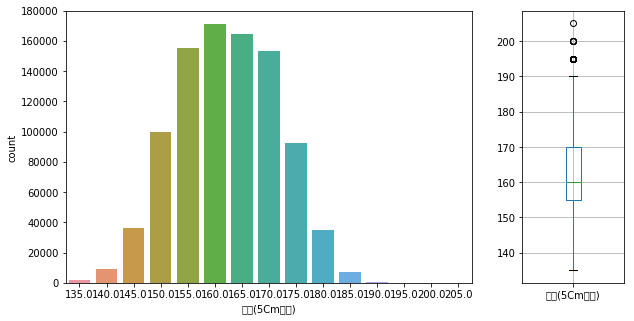

In [36]:
# 신장 이상치 제거
# 신장 130cm 이하 키 모두 제거 1900cm 키 190cm로 변경

data = data[(data['신장(5Cm단위)'] > 130)]
data['신장(5Cm단위)'] = data['신장(5Cm단위)'].replace(1900,190)

figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(10,5)

sns.countplot(data['신장(5Cm단위)'], ax=ax1);
data[['신장(5Cm단위)']].boxplot(ax = ax2);


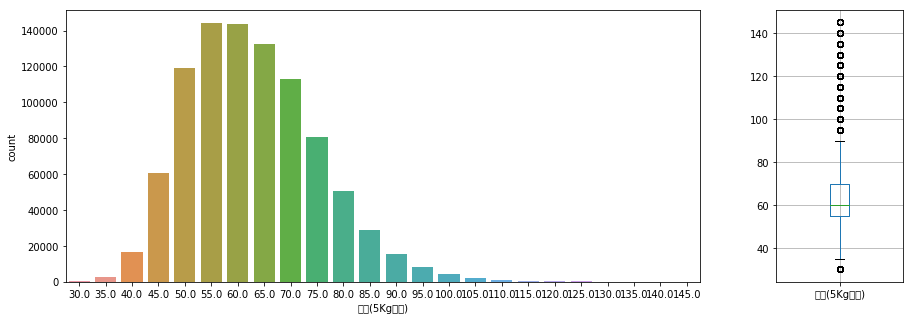

In [37]:
# 체중이 25kg이하 150kg 이상인 데이터를 제거한다. 
data = data[(data['체중(5Kg단위)'] < 150) & (data['체중(5Kg단위)'] > 25)]
                                         
figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[5,1]})
figure.set_size_inches(15,5)

sns.countplot(data['체중(5Kg단위)'], ax=ax1);
data[['체중(5Kg단위)']].boxplot(ax = ax2);

In [38]:
#허리둘레의 결측치 제거한다.

print("결측치 처리 전:")
print(data['허리둘레'].isnull().sum())

data = data[~(data['허리둘레'].isnull())]

print("결측치 처리 후:")
print(data['허리둘레'].isnull().sum())

결측치 처리 전:
84
결측치 처리 후:
0


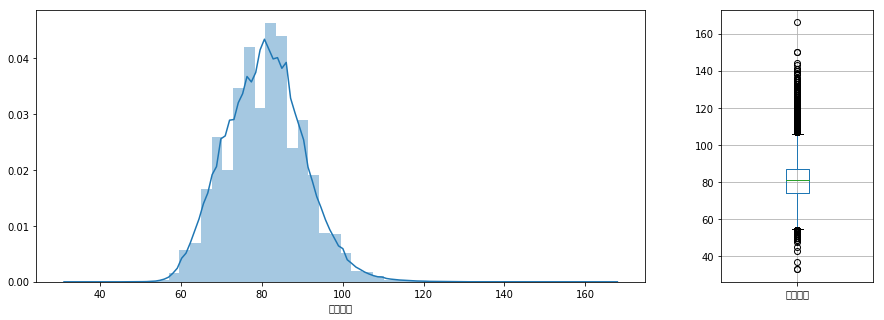

In [39]:
# 허리둘레는 30이하는 이상치라 판단하여 제거
# 허리둘레는 999는 말이 안되므로 제거

tmp3 = data['허리둘레'] <= 30
tmp4 = data['허리둘레'] == 999

data = data[~(tmp3 | tmp4)]

figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(15,5)

sns.distplot(data['허리둘레'], ax=ax1);
data[['허리둘레']].boxplot(ax = ax2);

In [40]:
#시력이 좌우 둘다 결측치인 경우 제거한다.

print("결측치 처리 전:")
print(data[['시력(좌)','시력(우)']].isnull().sum())

tmp5 = data['시력(좌)'].isnull()
tmp6 = data['시력(우)'].isnull()

data = data[~(tmp5 & tmp6)]

print("1차 결측치 처리 후:")
print(data[['시력(좌)','시력(우)']].isnull().sum())

#반대 시력으로 결측치를 채운다.
data.loc[tmp5, '시력(좌)'] = data['시력(우)']
data.loc[tmp6, '시력(우)'] = data['시력(좌)']


print("2차 결측치 처리 후:")
print(data[['시력(좌)','시력(우)']].isnull().sum())  

결측치 처리 전:
시력(좌)    168
시력(우)    167
dtype: int64
1차 결측치 처리 후:
시력(좌)    15
시력(우)    14
dtype: int64
2차 결측치 처리 후:
시력(좌)    0
시력(우)    0
dtype: int64


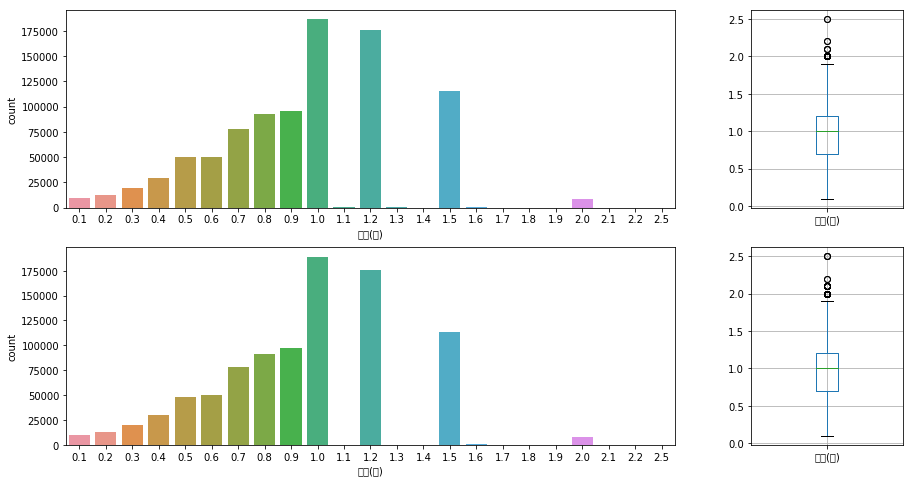

In [41]:
tmp7 = data["시력(좌)"] >= 9
tmp8 = data["시력(우)"] >= 9

# 시력이 양쪽 모두 9 이상이면 제거
data = data[~(tmp7 & tmp8)]

# 한쪽만 9이상 이면 반대쪽으로 맞춤
data.loc[tmp7, '시력(좌)'] = data['시력(우)']
data.loc[tmp8, '시력(우)'] = data['시력(좌)']

figure, ax = plt.subplots(nrows = 2, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(15,8)

sns.countplot(data['시력(좌)'], ax=ax[0][0]);
data[['시력(좌)']].boxplot(ax = ax[0][1]);
sns.countplot(data['시력(우)'], ax=ax[1][0]);
data[['시력(우)']].boxplot(ax = ax[1][1]);

In [43]:
#혈색소 결측치 제거
data.dropna(subset=['혈색소'],how='all',inplace=True)
#혈색소 이상치 제거
data=data[data['혈색소']>3] 

In [44]:
#요단백 결측치 처리
#최빈값인 1로 대체
data["요단백"].fillna(1,inplace=True)

#요단백 이상치 처리 없음

In [45]:
# 혈청 삼형제 NaN값 제거 data = data.dropna(subset=['혈청크레아티닌'], how='all')
data = data.dropna(subset=['(혈청지오티)AST'], how='all')
data = data.dropna(subset=['(혈청지오티)ALT'], how='all')

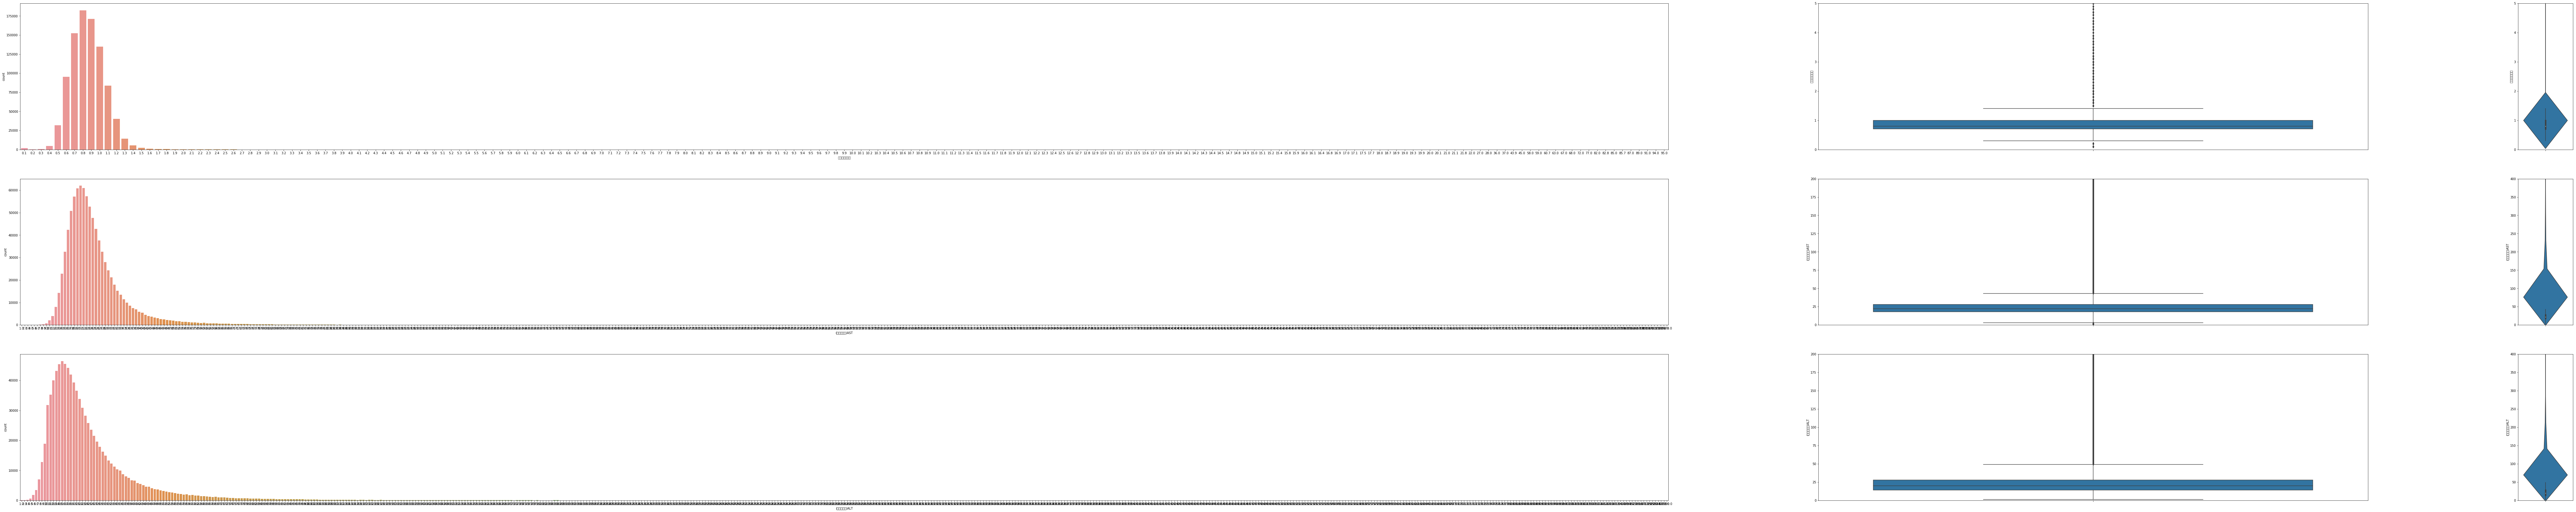

In [46]:
# Countplot & Boxplot & Violinplot 
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=\
plt.subplots(nrows=3,ncols=3,gridspec_kw={'width_ratios':[3,1,0.1]})
figure.set_size_inches(150,30)

ax2.set_ylim(0,5)
ax3.set_ylim(0,5)
ax5.set_ylim(0,200)
ax6.set_ylim(0,400)
ax8.set_ylim(0,200)
ax9.set_ylim(0,400)

sns.countplot(data['혈청크레아티닌'],ax=ax1)
sns.boxplot(y = data['혈청크레아티닌'],ax=ax2)
sns.violinplot(y = data['혈청크레아티닌'],ax=ax3)
sns.countplot(data['(혈청지오티)AST'],ax=ax4)
sns.boxplot(y = data['(혈청지오티)AST'],ax=ax5)
sns.violinplot(y = data['(혈청지오티)AST'],ax=ax6)
sns.countplot(data['(혈청지오티)ALT'],ax=ax7)
sns.boxplot(y = data['(혈청지오티)ALT'],ax=ax8)
sns.violinplot(y = data['(혈청지오티)ALT'],ax=ax9)

In [47]:
# 혈청 삼형제 이상치 제거 (안해도 될듯)
'''
tmp1 =data['혈청크레아티닌']<10
tmp2 =data['(혈청지오티)AST']<2000
tmp3 =data['(혈청지오티)ALT']<2000
data = data[tmp1&tmp2&tmp3]
'''

"\ntmp1 =data['혈청크레아티닌']<10\ntmp2 =data['(혈청지오티)AST']<2000\ntmp3 =data['(혈청지오티)ALT']<2000\ndata = data[tmp1&tmp2&tmp3]\n"